In [1]:
import pandas as pd
import pandas as pd
import geopandas as gp
import fiona
import shapely
from fiona.crs import from_epsg
import numpy as np
import choroplethNYC as cp
import matplotlib.pylab as plt

%matplotlib inline

In [2]:
#import precinct shapefile

url = 'https://data.cityofnewyork.us/api/geospatial/78dh-3ptz?method=export&format=Shapefile'
precinct = gp.GeoDataFrame.from_file(url)
precinct.head(2)


,precinct,shape_area,shape_leng,geometry
0,1.0,4.730176e+07,80586.154615,(POLYGON ((-74.0438776157395 40.69018767637665...
1,5.0,1.808880e+07,18676.124259,POLYGON ((-73.98863862848766 40.72293372026369...


In [ ]:
#calculate area for each precinct


In [4]:
#calculating square kilometers 
#based on advice from stackexchange
#https://gis.stackexchange.com/questions/218450/getting-polygon-areas-using-geopandas

precinct['sq_km'] = precinct['geometry'].to_crs({'init': 'epsg:3395'})\
               .map(lambda p: p.area / 10**6)

In [5]:
precinct.head(3)

,precinct,shape_area,shape_leng,geometry,sq_km
0,1.0,4.730176e+07,80586.154615,(POLYGON ((-74.0438776157395 40.69018767637665...,7.626180
1,5.0,1.808880e+07,18676.124259,POLYGON ((-73.98863862848766 40.72293372026369...,2.916932
2,6.0,2.209819e+07,26402.900669,POLYGON ((-73.99968392160721 40.73855224865976...,3.565315


In [7]:
#get total area 
#should be 784 km2 - is not

total_area = precinct['sq_km'].sum()

total_area

1357.9533730025544

In [9]:
#get shapely generated polygon area
precinct['area?'] = precinct['geometry'].area

In [10]:
precinct.head()

,precinct,shape_area,shape_leng,geometry,sq_km,area?
0,1.0,4.730176e+07,80586.154615,(POLYGON ((-74.0438776157395 40.69018767637665...,7.626180,0.000468
1,5.0,1.808880e+07,18676.124259,POLYGON ((-73.98863862848766 40.72293372026369...,2.916932,0.000179
2,6.0,2.209819e+07,26402.900669,POLYGON ((-73.99968392160721 40.73855224865976...,3.565315,0.000219
3,71.0,4.533179e+07,29978.094261,POLYGON ((-73.92854313809303 40.66457328584737...,7.298288,0.000448
4,72.0,1.046213e+08,87968.194520,POLYGON ((-73.99840899113158 40.67186872303234...,16.838260,0.001035


In [15]:
#total for the "shape_area" column
given_area_total = precinct['shape_area'].sum()

In [16]:
#total for the shapely area
area_unknown = precinct['area?'].sum()

In [17]:
#calculate allocation based on each of these areas

precinct['sq-km-calc'] = (precinct['sq_km']/total_area)*20000
precinct['given-area-calc'] = (precinct['shape_area']/given_area_total)*20000
precinct['shapely-area-calc'] = (precinct['area?']/area_unknown)*20000

In [19]:
precinct.tail(10)

,precinct,shape_area,shape_leng,geometry,sq_km,area?,sq-km-calc,given-area-calc,shapely-area-calc
67,110.0,1.121037e+08,72813.140367,POLYGON ((-73.83591564941987 40.74343089339343...,18.092228,0.001110,266.463166,266.071164,266.265962
68,111.0,2.601573e+08,97448.260334,POLYGON ((-73.71351828238181 40.75983773083408...,42.002741,0.002577,618.618316,617.467131,618.038540
69,112.0,8.894508e+07,41644.036156,POLYGON ((-73.83289066481898 40.72794986030247...,14.345551,0.000881,211.281943,211.105622,211.193454
70,113.0,3.896372e+08,214242.997647,(POLYGON ((-73.78478547486449 40.6179807218354...,62.727155,0.003855,923.848441,924.779741,924.319412
71,114.0,1.800062e+08,113659.975742,(POLYGON ((-73.94180032729426 40.7690469266246...,29.073874,0.001784,428.201352,427.233453,427.713578
72,115.0,1.132939e+08,58272.204348,"POLYGON ((-73.85907893495997 40.7625228322724,...",18.294696,0.001123,269.445132,268.895995,269.168460
73,120.0,2.325353e+08,96171.723983,POLYGON ((-74.05356753570328 40.60369646682845...,37.395433,0.002299,550.761661,551.908178,551.340215
74,121.0,4.757161e+08,138115.721207,(POLYGON ((-74.15945602438185 40.6414483333240...,76.460615,0.004703,1126.115462,1129.082633,1127.611767
75,122.0,4.547993e+08,154881.006310,(POLYGON ((-74.05050806403284 40.5664220346634...,73.030337,0.004494,1075.594182,1079.437820,1077.531563
76,123.0,4.608700e+08,120830.181066,POLYGON ((-74.16982656393461 40.56107800369057...,73.919472,0.004551,1088.689391,1093.846403,1091.286060


#### looks like the allocation is similar enough accross all 3 that none of these options stands out as the best choice 

In [27]:
#export 

precinct_to_exp = precinct[['precinct', 'sq-km-calc']]

precinct_to_exp.to_csv('area_model_results.csv')

In [21]:
#plot allocation by land area

precinct.to_crs(epsg=2263, inplace=True)
precinct.crs

{'init': 'epsg:2263', 'no_defs': True}

/Users/katharinevoorhees/anaconda3/lib/python3.6/site-packages/pysal/__init__.py:65: VisibleDeprecationWarning: PySAL's API will be changed on 2018-12-31. The last release made with this API is version 1.14.4. A preview of the next API version is provided in the `pysal` 2.0 prelease candidate. The API changes and a guide on how to change imports is provided at https://pysal.org/about
  ), VisibleDeprecationWarning)


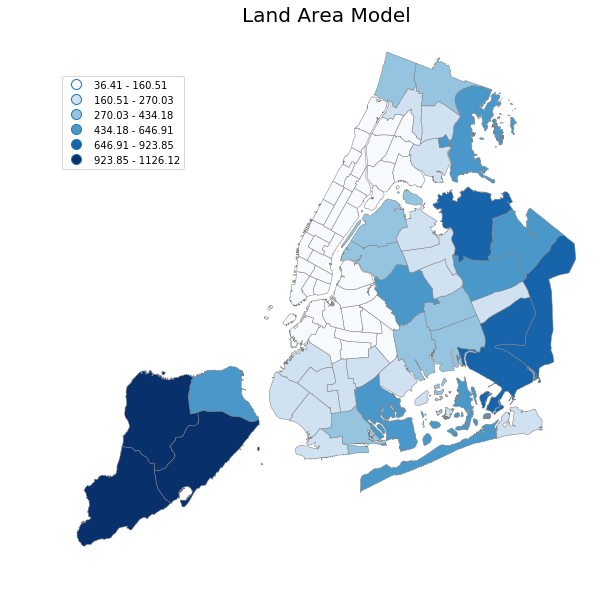

In [22]:
#make cloropleth of precincts shaded by allocation in this model 

f,ax = plt.subplots(figsize=(10,10))
precinct.plot(column='sq-km-calc', cmap="Blues", edgecolor="grey",ax=ax,
              scheme='fisher_jenks',k=6, lw=.5, legend=True)
ax.axis('off')
plt.title('Land Area Model' ,fontsize=(20))

leg = ax.get_legend()
leg.set_bbox_to_anchor((0,-.08,.25,1));